# Advanced usage

In [1]:
import sys
import importlib

sys.path.append("../")

import flowgsp
from flowgsp.utils import *
from flowgsp.graphs.basic_graphs import create_cycle_graph
from flowgsp.graphs.physical_graphs import create_torus_vortex_graph

import scienceplots
plt.style.use(['science','ieee', 'no-latex'])

# for better visualisation of graphs. Comment out if not needed
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = [3, 2]

# import warnings
# # Suppress FutureWarning messages
# warnings.simplefilter(action='ignore', category=FutureWarning)

## Description

Show examples of how to use all the methods developed in coordination with `flowgsp`

GOAL: Know how to perform advanced utilization with `flowgsp`

## Table of Contents

- [Hilbert Transform](#hilbert-transform)
- [Surrogates](#surrogates)

### Hilbert Transform

In [2]:
G, pos = create_cycle_graph(40, 1)
graph = flowgsp.graphs.Graph(G=G, pos=pos)
graph.set_operator('adjacency', normalize='left') # in the graph Hilbert paper we mainly employ the adjacency operator

/Users/mikichan/miniconda3/envs/dGSP/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Hilbert Filtered Signal')

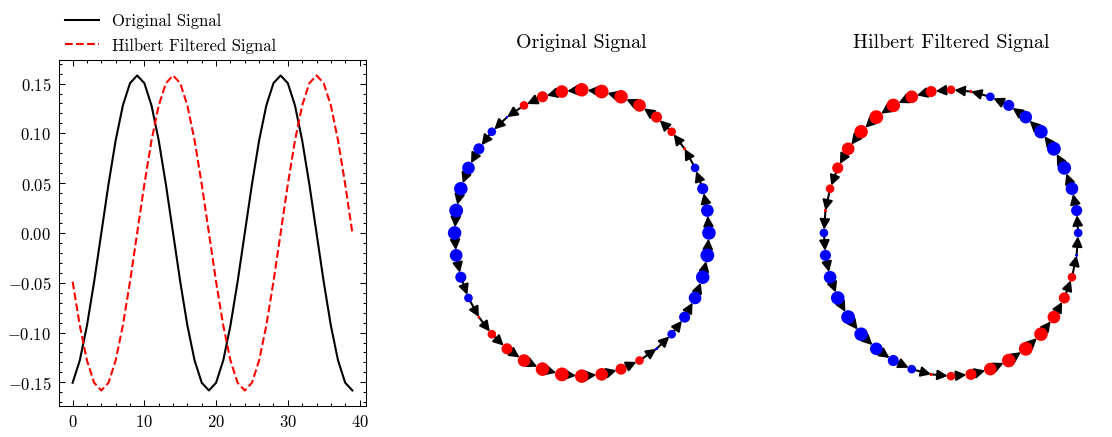

In [6]:
hilbert = flowgsp.filters.HilbertFilter(graph)

fig, ax = plt.subplots(1, 3, figsize=(9, 3))

signal = graph.operator.U[:, 3].real
hilbert_filtered_signal = hilbert.hilbert_transform(signal)
ax[0].plot(signal, label='Original Signal')
ax[0].plot(hilbert_filtered_signal, label='Hilbert Filtered Signal', linestyle='--')
ax[0].legend(loc=(0, 1))

graph.draw_signal(signal, axes=ax[1], scale=200)
ax[1].set_title('Original Signal')
graph.draw_signal(hilbert_filtered_signal, axes=ax[2], scale=200)
ax[2].set_title('Hilbert Filtered Signal')

Text(0.5, 1.0, 'Amplitude GFT Coefficients')

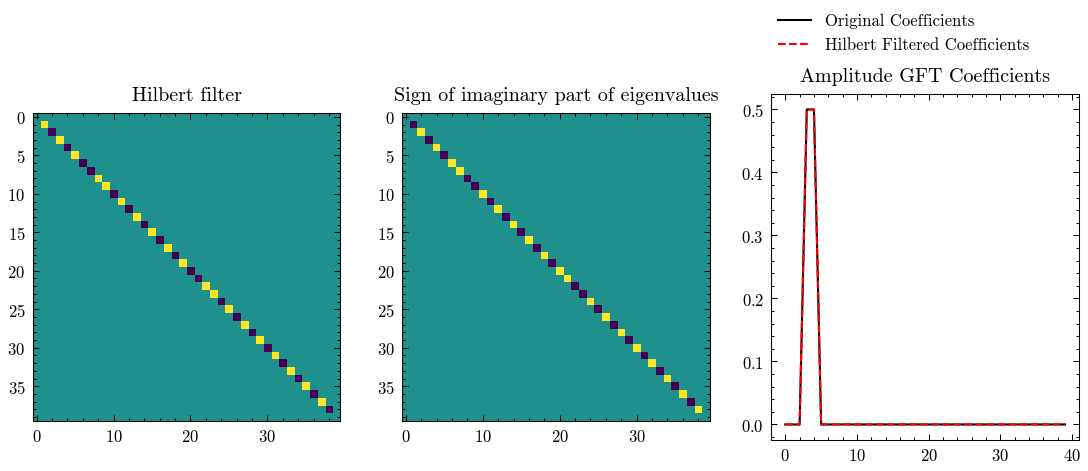

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].imshow(hilbert.hilbert_filter().imag)
ax[1].imshow(np.sign(np.diag(graph.operator.V.imag)))
ax[0].set_title('Hilbert filter')
ax[1].set_title('Sign of imaginary part of eigenvalues')

coefs = graph.operator.GFT(signal)
filtered_coefs = graph.operator.GFT(hilbert_filtered_signal)
ax[2].plot(np.abs(coefs), label='Original Coefficients')
ax[2].plot(np.abs(filtered_coefs), linestyle='--', label='Hilbert Filtered Coefficients')
ax[2].legend(loc=(0, 1.1))
ax[2].set_title('Amplitude GFT Coefficients')

### Surrogates

<!-- Here we show examples in two graphs to observe the perks of directed graphs -->

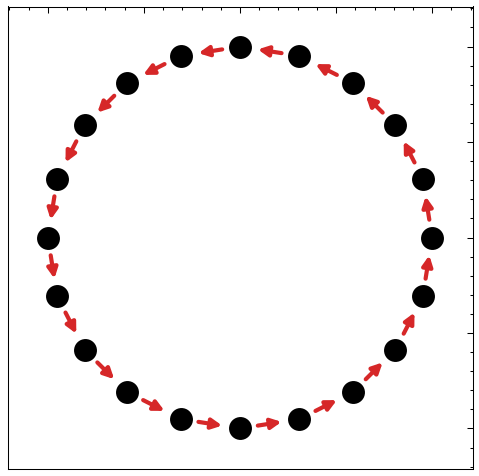

In [15]:
G, pos = create_cycle_graph(20, 1)
graph = flowgsp.graphs.Graph(G=G, pos=pos)
graph.set_operator('adjacency') # in the surrogate paper we mainly employ the adjacency operator

fig, ax = plt.subplots(1, figsize=(4, 4))
graph.draw(axes=ax, node_size=100, node_color='k', arrow_size=10, arrow_width=2)

Text(0.5, 1.0, 'Power Spectral Density')

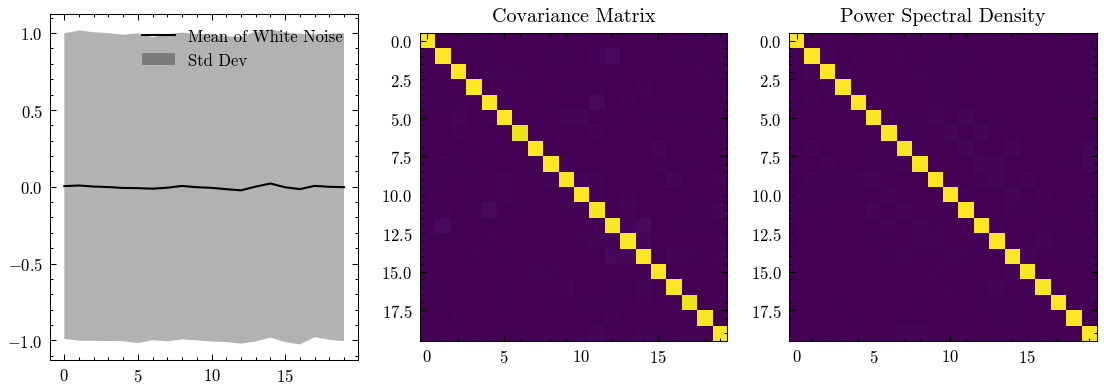

In [16]:
surrogate = flowgsp.surrogates.Surrogate(graph)

white_noise = surrogate.white_noise_generator(10000)
covariance = surrogate.estimate_covariance(white_noise)
psd = surrogate.estimate_psd(covariance).real

fig, ax = plt.subplots(1, 3, figsize=(9, 3))
mean = white_noise.mean(axis=0)
std = white_noise.std(axis=0)
ax[0].plot(mean, label='Mean of White Noise')
ax[0].fill_between(range(mean.shape[0]), mean - std, mean + std, alpha=0.3, label='Std Dev')
ax[0].legend()

ax[1].imshow(covariance, cmap='viridis', vmin=0, vmax=1)
ax[1].set_title('Covariance Matrix')
ax[2].imshow(psd, label='Estimated PSD', vmin=0, vmax=1)
ax[2].set_title('Power Spectral Density')

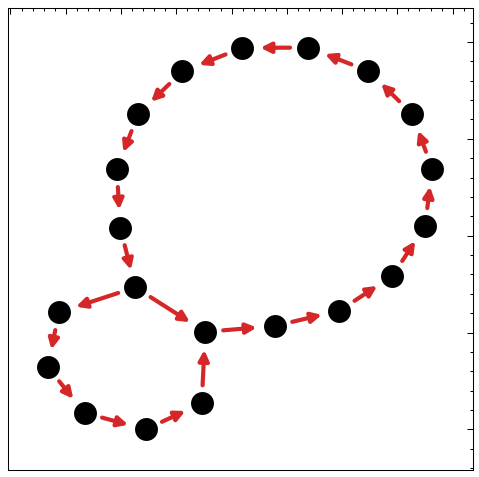

In [11]:
G, pos = create_cycle_graph(20, 2)
graph = flowgsp.graphs.Graph(G=G, pos=pos)
graph.set_operator('adjacency') # in the surrogate paper we mainly employ the adjacency operator
fig, ax = plt.subplots(1, figsize=(4, 4))
graph.draw(axes=ax, node_size=100, node_color='k', arrow_size=10, arrow_width=2)

Text(0.5, 1.0, 'Power Spectral Density')

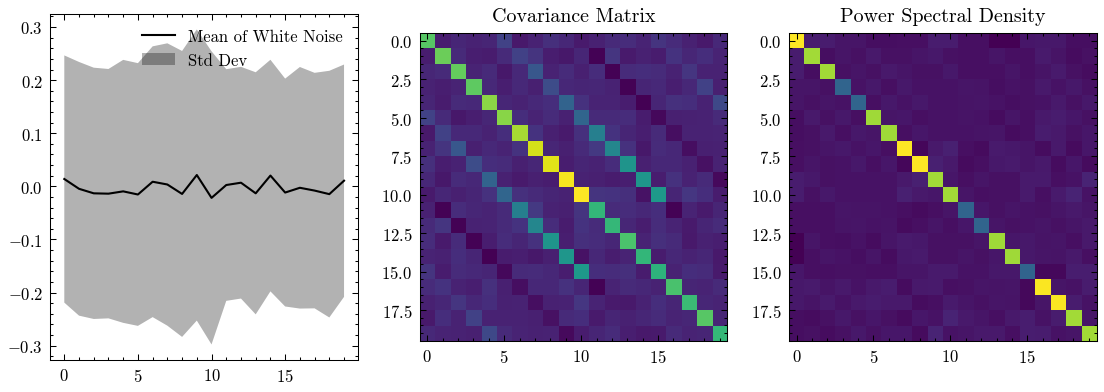

In [13]:
dirac_signal = np.zeros(graph.N)
dirac_signal[0] = 1  # Dirac delta function at node 0

surrogate = flowgsp.surrogates.Surrogate(graph)

surrogate_data = surrogate.directed_random_surrogate(dirac_signal, 1000)
covariance = surrogate.estimate_covariance(surrogate_data)
psd = surrogate.estimate_psd(covariance).real

fig, ax = plt.subplots(1, 3, figsize=(9, 3))
mean = surrogate_data.mean(axis=0)
std = surrogate_data.std(axis=0)
ax[0].plot(mean, label='Mean of White Noise')
ax[0].fill_between(range(mean.shape[0]), mean - std, mean + std, alpha=0.3, label='Std Dev')
ax[0].legend()

ax[1].imshow(covariance, cmap='viridis')
ax[1].set_title('Covariance Matrix')
ax[2].imshow(psd, label='Estimated PSD')
ax[2].set_title('Power Spectral Density')

For others more involved methods and usage contact me @Michael <miki998chan@gmail.com>